## Cryptocurrency Price Prediction Project

##### Using machine learning for cryptocurrency price prediction can only work in situations where prices change due to historical prices that people see before buying and selling the cryptocurrency.

In [5]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.3/315.3 kB 371.7 kB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 20.5 kB/s eta 0:00:0000:0200:04m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 71.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 76.7 kB/s eta 0:00:00a 0:00:01
  Created wheel for frozendict: filename=frozendict-2.4.2-cp311-cp311-macosx_11_0_arm64.whl size=15503 sha256=8755eb56acc7700c29a027ca754bd6eb25208c19aba5b104176ba69d20208457
  Stored in directory: /Users/oluwadamilolapopoola/Library/Caches/pip/wheels/b6/d6/b5/da9ad65b3c11d2d2f3245b0b2476231dc58a2a91768c5ec755
  Created wheel for peewee: filename=peewee-3.17.3-cp311-cp3

In [25]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date,timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days= 70) #Total number of days we are working with at the moment. 
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download("BTC-USD", #Bitcoin
                  start=start_date,
                  end=end_date,
                  progress=False)
data["Date"]= data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace= True)

In [35]:
#print(data.head())

In [37]:
#print(data.tail())

In [31]:
data.shape

(70, 7)

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



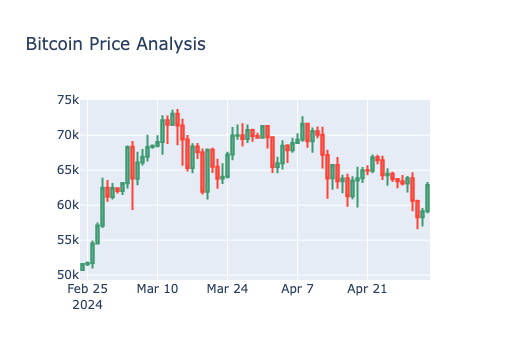

In [33]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                       open=data["Open"],
                                       high=data["High"],
                                       low=data["Low"],
                                       close=data["Close"])])
figure.update_layout(title = "Bitcoin Price Analysis", 
                     xaxis_rangeslider_visible=False)